In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Hotel_Reviews.csv")
df.head(3)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968


In [3]:
df_copy = df.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

In [5]:
df.Hotel_Address.value_counts(dropna = False)

163 Marsh Wall Docklands Tower Hamlets London E14 9SJ United Kingdom              4789
372 Strand Westminster Borough London WC2R 0JJ United Kingdom                     4256
Westminster Bridge Road Lambeth London SE1 7UT United Kingdom                     4169
Scarsdale Place Kensington Kensington and Chelsea London W8 5SY United Kingdom    3578
7 Pepys Street City of London London EC3N 4AF United Kingdom                      3212
                                                                                  ... 
21 rue Lavoisier 8th arr 75008 Paris France                                         12
2 4 Boundary Street Hackney London E2 7DD United Kingdom                            12
Via M Buonarroti 13 Fiera Milano City 20149 Milan Italy                             10
13 Rue Fran ois Ory 92120 Paris France                                              10
Johann Staud Stra e 32 16 Ottakring 1160 Vienna Austria                              8
Name: Hotel_Address, Length: 1493, dtype: i

In [6]:
df.Hotel_Address.nunique()

(1493,)

In [7]:
df.Review_Date.value_counts(dropna = False)

8/2/2017      2585
9/15/2016     2308
4/5/2017      2284
8/30/2016     1963
2/16/2016     1940
              ... 
9/10/2016      199
11/27/2015     194
4/3/2017       192
4/1/2017       173
4/2/2017       143
Name: Review_Date, Length: 731, dtype: int64

In [8]:
dates = df.Review_Date.value_counts()[:10]

In [9]:
dates.index

Index(['8/2/2017', '9/15/2016', '4/5/2017', '8/30/2016', '2/16/2016',
       '7/5/2016', '5/31/2016', '12/5/2016', '7/12/2016', '8/2/2016'],
      dtype='object')

Text(0, 0.5, 'Count')

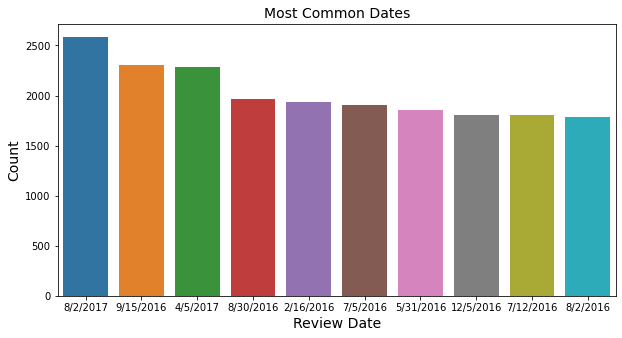

In [10]:
plt.figure(figsize = (10,5))
sns.barplot(x = dates.index, y = dates)
plt.title("Most Common Dates", fontdict = {"fontsize" : 14})
plt.xlabel("Review Date", fontdict = {"fontsize" : 14})
plt.ylabel("Count", fontdict = {"fontsize" : 14})

## Hotel Name

In [11]:
df.Hotel_Name.unique().shape#1492 farklı hotel ismi var

(1492,)

In [12]:
df.Hotel_Name.value_counts(dropna = False)

Britannia International Hotel Canary Wharf           4789
Strand Palace Hotel                                  4256
Park Plaza Westminster Bridge London                 4169
Copthorne Tara Hotel London Kensington               3578
DoubleTree by Hilton Hotel London Tower of London    3212
                                                     ... 
Ibis Styles Milano Palmanova                           12
Hotel Eitlj rg                                         12
Hotel Wagner                                           10
Mercure Paris Porte d Orleans                          10
Hotel Gallitzinberg                                     8
Name: Hotel_Name, Length: 1492, dtype: int64

In [13]:
names = df.Hotel_Name.value_counts(dropna = False)[:10]## ençok yorum alan 10 otel ismi

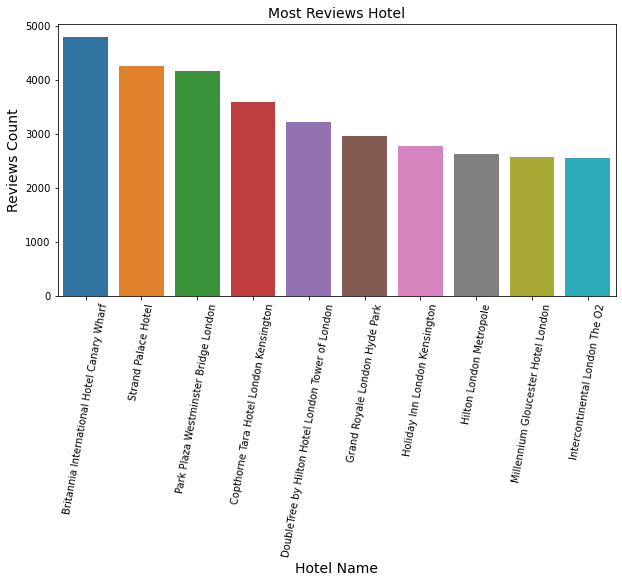

In [14]:
plt.figure(figsize = (10,5))
sns.barplot(x = names.index, y = names)
plt.title("Most Reviews Hotel", fontdict = {"fontsize" : 14})
plt.xlabel("Hotel Name", fontdict = {"fontsize" : 14})
plt.ylabel("Reviews Count", fontdict = {"fontsize" : 14})
plt.xticks(rotation=80);

## Reviewer Nationality                        

In [15]:
nationality = df.Reviewer_Nationality.value_counts(dropna = False)[:10]

In [16]:
df.Reviewer_Nationality.unique().shape## 227 farklı milleten yorum var. 

(227,)

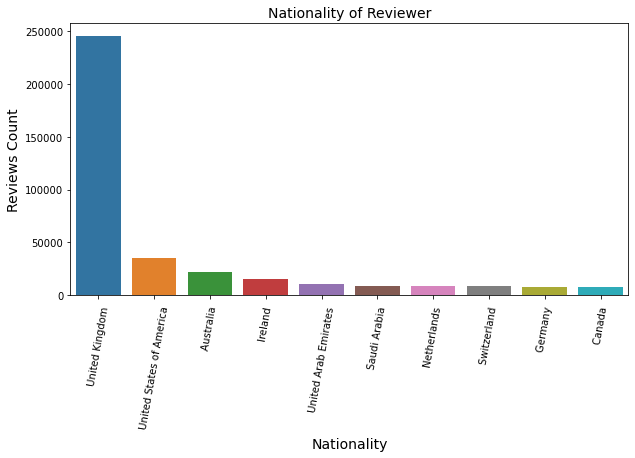

In [17]:
plt.figure(figsize = (10,5))
sns.barplot(x = nationality.index, y = nationality)
plt.title("Nationality of Reviewer", fontdict = {"fontsize" : 14})
plt.xlabel("Nationality", fontdict = {"fontsize" : 14})
plt.ylabel("Reviews Count", fontdict = {"fontsize" : 14})
plt.xticks(rotation=80);

## All Reviews

In [20]:
df_copy["Negative_Review"] = [i.strip() for i in df_copy["Negative_Review"]]# stripingin negative reviews
df_copy["Positive_Review"] = [i.strip() for i in df_copy["Positive_Review"]] #stripingin positive reviews
df_copy["All_Review"] = df_copy["Negative_Review"] + " " + df_copy["Positive_Review"] 
#We combine 2 reviews and create the all review featuer.

In [21]:
df_copy.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,All_Review
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available ...,397,1403,Only the park outside of the hotel was beautiful,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,I am so angry that i made this post available ...
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great l...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,No Negative No real complaints the hotel was g...
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficult...,42,1403,Location was good and staff were ok It is cute...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968,Rooms are nice but for elderly a bit difficult...
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk bar...,210,1403,Great location in nice surroundings the bar an...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968,My room was dirty and I was afraid to walk bar...
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line yo...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968,You When I booked with your company on line yo...


## Cleaning Text

In [4]:
import re
import nltk
from nltk.corpus import stopwords
import nltk as nlp
from sklearn.feature_extraction.text import CountVectorizer

def clean(seri):
    text_list = []
    for text in seri:
        text = re.sub("[^a-zA-Z]", " ", text)
        text = text.lower()
        text = text.strip()
        text = nltk.word_tokenize(text)
        #text = [word for word in text if not word in set(stopwords.words("english"))]
        lemma = nlp.WordNetLemmatizer()
        text = [lemma.lemmatize(word) for word in text]
        text = " ".join(text)
        text = text.replace('  ',' ')
        text_list.append(text)
    return text_list        

In [23]:
text_list = []
import time
t1 = time.time()
for text in df_copy.All_Review:
    text = re.sub("[^a-zA-Z]", " ", text) #we drop numbers, special characters and punctuation marks from each line.
    text = text.lower() # lowercase
    text = text.strip() # We drop the spaces at the beginning and end of the line.
    text = nltk.word_tokenize(text)
    text = [word for word in text if not word in set(stopwords.words("english"))] # dropping stopwords
    lemma = nlp.WordNetLemmatizer()
    text = [lemma.lemmatize(word) for word in text] #
    text = " ".join(text)
    text = text.replace('  ',' ')
    text_list.append(text) # append to list
t2 = time.time()
print("prerocess ve tokenize için geçen süre", len(df_copy), "texts:", (t2-t1)/60, "min")     

prerocess ve tokenize için geçen süre 515738 texts: 34.10200097958247 min


In [24]:
df_copy["All_Review"] =  text_list 

import time
t1 = time.time()
df_copy["All_Review"]  = clean(df_copy["All_Review"]) 
t2 = time.time()
print("prerocess ve tokenize için geçen süre", len(df_copy), "texts:", (t2-t1)/60, "min") 

In [25]:
df_copy.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,All_Review
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available ...,397,1403,Only the park outside of the hotel was beautiful,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,angry made post available via possible site us...
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great l...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,negative real complaint hotel great great loca...
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficult...,42,1403,Location was good and staff were ok It is cute...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968,room nice elderly bit difficult room two story...
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk bar...,210,1403,Great location in nice surroundings the bar an...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968,room dirty afraid walk barefoot floor looked c...
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line yo...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968,booked company line showed picture room though...


In [26]:
df_copy.All_Review

0         angry made post available via possible site us...
1         negative real complaint hotel great great loca...
2         room nice elderly bit difficult room two story...
3         room dirty afraid walk barefoot floor looked c...
4         booked company line showed picture room though...
                                ...                        
515733         trolly staff help take luggage room location
515734    hotel look like surely breakfast ok got earlie...
515735     ac useless hot week vienna gave hot air positive
515736    negative room enormous really comfortable beli...
515737                   rd floor work free wife staff kind
Name: All_Review, Length: 515738, dtype: object

In [27]:
#df_copy["Reviewer_Score"] = [0 if i <=3.0  else 1 for i in df["Reviewer_Score"] ]### 3 ve altı negative review

In [28]:
def create_classes(df_ratings): # create function to convert review rating into classes.
    for i in range(len(df_ratings)):
        if df_ratings[i]<=4.0:
            df_ratings[i] = 0
        elif (df_ratings[i]<=6.0) and df_ratings[i]>=5.0:
            df_ratings[i] = 1
        else:
            df_ratings[i] = 2
## If the score is 4 or less, it is negative, 5 or 6 is neatural, 7 and above is positive. 
## negative = 0, neutre = 1, positive = 2

In [29]:
create_classes(df_copy["Reviewer_Score"])

In [30]:
df_copy["Reviewer_Score"].value_counts()# we have 474447 positive reviews, 30479 neutural review and 10812 negative reviews

2.0    474447
1.0     30479
0.0     10812
Name: Reviewer_Score, dtype: int64

In [31]:
df_lst = df_copy[["All_Review", "Reviewer_Score"]]
df_lst.to_csv("All_reviews.csv", columns = ["All_Review", "Reviewer_Score"], index = False)# savig our new dataframe

In [32]:
df_lst.head()

,All_Review,Reviewer_Score
0,angry made post available via possible site us...,0.0
1,negative real complaint hotel great great loca...,2.0
2,room nice elderly bit difficult room two story...,2.0
3,room dirty afraid walk barefoot floor looked c...,0.0
4,booked company line showed picture room though...,2.0
